In [1]:
### BDS Homework 4 - Problem 1 - CIFAR dataset
### &
### Problem 4 - CIFAR Continued

In [2]:
#Problem 1
import numpy as np
from sklearn.datasets import fetch_openml

#Use the fetch openml command from sklearn.datasets to import the CIFAR-10-Small data set

df = fetch_openml('CIFAR_10_small')

df

{'data':           a0     a1     a2     a3     a4     a5     a6     a7     a8     a9  \
 0       59.0   43.0   50.0   68.0   98.0  119.0  139.0  145.0  149.0  149.0   
 1      154.0  126.0  105.0  102.0  125.0  155.0  172.0  180.0  142.0  111.0   
 2      255.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0   
 3       28.0   37.0   38.0   42.0   44.0   40.0   40.0   24.0   32.0   43.0   
 4      170.0  168.0  177.0  183.0  181.0  177.0  181.0  184.0  189.0  189.0   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 19995   76.0   76.0   77.0   76.0   75.0   76.0   76.0   76.0   76.0   78.0   
 19996   81.0   91.0   98.0  106.0  108.0  110.0   80.0   84.0   88.0   90.0   
 19997   20.0   19.0   15.0   15.0   14.0   13.0   12.0   11.0   10.0    9.0   
 19998   25.0   15.0   23.0   17.0   23.0   51.0   74.0   91.0  114.0  137.0   
 19999   73.0   98.0   99.0   77.0   59.0  146.0  214.0  176.0  125.0  218.0   
 
        ...  a3062  a3063  a30

(32, 32, 3)


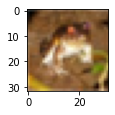

In [3]:
#Figure out how to display some of the images in this data set, and display a couple.


#Plot Images
from matplotlib import pyplot as plt

index = 0
display_image = df.data
display_image = display_image.iloc[[index] , :]
#display_label = df.target
display_image = display_image.to_numpy().reshape(3,32,32).T /255
display_image = display_image.swapaxes(0,1)

from matplotlib import pyplot as plt
print(display_image.shape)
plt.figure(figsize=(1.5,1.5))
plt.imshow(display_image)

plt.show()

In [4]:
#train test split for x train y train x test y test on a 3/4 / 1/4 ratio

from sklearn.model_selection import train_test_split

X = df.data.to_numpy()
y = df.target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1/4, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression using multinomial.

#Stadard scaler as preprocessing step for solver sage

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

#Logistic Regression using multinomial

#c_val=[x for x in np.arange(0.1,0.3,0.1)]
c_val=[0.1,0.2,0.4,0.8,1,1.2,1.5,1.8,2]

l1_res={}
l1_loss={}
#L1 regularization
for c in c_val:
    logisticRegression = LogisticRegression(solver='saga',multi_class='multinomial',C=c,penalty='l1')
    logisticRegression.fit(X_train_scaled,y_train)
    #y_pred=logisticRegression.predict(X_test_scaled)
    l1_res[c]=logisticRegression.score(X_test_scaled,y_test)
    l1_loss[c]=log_loss(y_test,logisticRegression.predict_proba(X_test),labels=['0','1','2','3','4','5','6','7','8','9'])

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimah

In [7]:
#Report your training and test loss from above

lowest = max(l1_res, key=l1_res.get)


print("Highest accuracy was achieved for C value of: ", lowest," for an accuracy of: ",l1_res[lowest])
print("loss values for each value of alpha: \n")

l1_loss

Highest accuracy was achieved for C value of:  0.1  for an accuracy of:  0.3924
loss values for each value of alpha: 



{0.1: 23.539285818688327,
 0.2: 23.363276415038847,
 0.4: 23.36344907095878,
 0.8: 23.394606103050187,
 1: 23.417009849507906,
 1.2: 23.42486491628771,
 1.5: 23.430558154939554,
 1.8: 23.44048803577338,
 2: 23.441695548492593}

In [8]:
l2_res={}
l2_loss={}
#L1 regularization
for c in c_val:
    logisticRegression = LogisticRegression(solver='saga',multi_class='multinomial',C=c,penalty='l2')
    logisticRegression.fit(X_train_scaled,y_train)
    y_pred=logisticRegression.predict(X_test_scaled)
    l2_res[c]=logisticRegression.score(X_test_scaled,y_test)
    #l2_loss[c]=log_loss(y_test,y_pred)
    l2_loss[c]=log_loss(y_test,logisticRegression.predict_proba(X_test),labels=['0','1','2','3','4','5','6','7','8','9'])

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manvimah

In [9]:
lowest = max(l2_res, key=l2_res.get)


print("Highest accuracy was achieved for C value of: ", lowest," for an accuracy of: ",l2_res[lowest])

print("loss values for each value of alpha: \n")

l2_loss

Highest accuracy was achieved for C value of:  0.2  for an accuracy of:  0.3606
loss values for each value of alpha: 



{0.1: 23.45352142566835,
 0.2: 23.457818246438038,
 0.4: 23.46733723260369,
 0.8: 23.47359320242379,
 1: 23.474947828321564,
 1.2: 23.471798726310936,
 1.5: 23.47372546777759,
 1.8: 23.47541745069025,
 2: 23.47078899494649}

In [10]:
#How sparse can you make your solutions without deteriorating your testing error too much?
#Here, we ask for a sparse solution that has test accuracy that is close to the best solution you
#found.


l1_spar={}
l2_spar={}
#we also tested with original c vals and found that sparsity decreased the higher our c values were
#for this part we lowered the c values further


c_val=[0.01,0.04,0.06,0.08]
# Set regularization parameter
for C in c_val:
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")


    clf_l1_LR.fit(X_train_scaled,y_train)
    clf_l2_LR.fit(X_train_scaled,y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))

    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X_test_scaled,y_test)))

    print("{:<40} {:.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X_test_scaled,y_test)))

    l1_spar[C]=sparsity_l1_LR
    l2_spar[C]=sparsity_l2_LR


C=0.01
Sparsity with L1 penalty:                95.99%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.38
Score with L2 penalty:                   0.39
C=0.04
Sparsity with L1 penalty:                88.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.40
Score with L2 penalty:                   0.37
C=0.06
Sparsity with L1 penalty:                81.25%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.40
Score with L2 penalty:                   0.37
C=0.08
Sparsity with L1 penalty:                73.36%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.40
Score with L2 penalty:                   0.37


### Problem 2: MNIST multi class logistic regression¶

In [11]:
%%time

#Problem 2: Part 1: Use the fetch openml command from sklearn.datasets to import the MNIST data set,
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

CPU times: user 16.3 s, sys: 564 ms, total: 16.8 s
Wall time: 1min 53s


In [12]:
X.shape[0]

70000

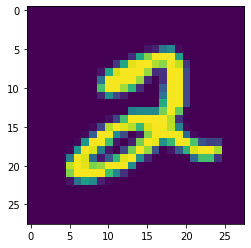

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

X_df = pd.DataFrame(X)
temp=X_df.iloc[5,:].values
temp = temp.reshape(28,28).astype('uint8')
plt.imshow(temp)

In [14]:
#Problem 2: Part 2: Choose a reasonable train-test split,
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000
)

In [15]:
#Problem 2: Part 2: run multi class logistic regression

from sklearn.linear_model import LogisticRegression
mnist_lgr = LogisticRegression(C=3, multi_class='multinomial', penalty="l2", solver="saga", tol=0.1, max_iter=1000)
mnist_lgr.fit(X_train, y_train)

LogisticRegression(C=3, max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=0.1)

In [16]:
#y_pred for score calculation
y_pred = mnist_lgr.predict(X_test)

In [17]:
#Problem 2: Part 3: training and test loss from above
from sklearn.metrics import accuracy_score

score = (accuracy_score(y_test,y_pred))*100
print("Accuracy score is %.2f%%"% score)

sparsity = np.mean(mnist_lgr.coef_ == 0) * 100
print("Sparsity value for L2 is %.2f%%"% sparsity)

Accuracy score is 91.82%
Sparsity value for L2 is 8.55%


Text(0.5, 0.98, 'Classification vector for...')

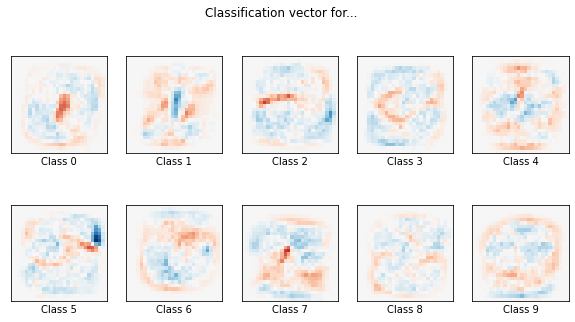

In [18]:
#Problem 2: Part 5: Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimen- sion as the data. Therefore we#
# can pretend that
# the coefficients of the solution are an image of the same dimension, and plot it. Do this for the 10 sets of coefficients that correspond to the
# 10 classes. You should observe that, at least for the sparse solutions, these “kind of” look like the digits they are classifying
import matplotlib.pyplot as plt

coef = mnist_lgr.coef_.copy()

plt.figure(figsize=(10, 5))

scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

In [19]:
#Problem 2: part 2: Cross entropy loss

from sklearn.metrics import log_loss

cross_entropy_loss = log_loss(y_test, mnist_lgr.predict_proba(X_test))
print("Logistic regression cross entropy loss: ",cross_entropy_loss)

Logistic regression cross entropy loss:  0.29243672509175805


In [20]:
#Problem 2: part 4: Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as
#good accuracy

mnist_lgr_l1 = LogisticRegression(C=3, multi_class='multinomial', penalty="l1", solver="saga", tol=0.1)
mnist_lgr_l1.fit(X_train, y_train)

y_pred_l1 = mnist_lgr_l1.predict(X_test)

score_l1 = accuracy_score(y_test,y_pred_l1)
print("Accuracy score is ", score_l1)

sparsity_l1 = np.mean(mnist_lgr_l1.coef_ == 0) * 100
print("Sparsity value for L1 is ", sparsity_l1)

Accuracy score is  0.9178
Sparsity value for L1 is  13.380102040816327


### #Problem 3: part 1: Use Random Forests to try to get the best possible test accuracy on MNIST. Use Cross
### Validation to find the best settings.

In [21]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_mnist = RandomForestClassifier(n_estimators=150)
rf_mnist.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [22]:
#Cross Validation Score for Random Forest Classifier
pred=rf_mnist.predict(X_test)

score = cross_val_score(rf_mnist, X_train, y_train)
print ("Cross Validation Score for Random Forest Classifier is: ",np.mean(score)*100)

Cross Validation Score for Random Forest Classifier is:  96.75333333333333


In [23]:
#Problem 3: part 2: use Gradient Boosting to do the same (we used catboost classifier) and hyperparams for best model

import catboost as ctb


#hyperparameters for best catboost model
cat = ctb.CatBoostClassifier(iterations=1000, 
                 learning_rate=0.03, depth=6, loss_function='MultiClass', 
        early_stopping_rounds= 1000, verbose=0)


cat.fit(X_train, y_train)

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
y_pred = cat.predict(X_test)

In [25]:
#catboost accuracy score
score = (accuracy_score(y_test,y_pred))*100
print("Accuracy score is %.2f%%"% score)

Accuracy score is 96.74%


In [26]:
#cross validation score
cv_results = cross_val_score(cat, X_train, y_train,
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose=0)    

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
print ("Cross Validation score for CatBoost Classifier: ",np.mean(cv_results)*100)

Cross Validation score for CatBoost Classifier:  95.95333333333333


##### We got a sparsity of 88% with highest accuracy of 40% as our best result at c=0.04 that beats our previous accuracy of 39% at c=0.1

### #Problem 4 - Part 1 - CIFAR : What is the best accuracy you can get on the test data, by tuning Random Forests?
### In a separate jupyter notebook